In [1]:
from meshed import DAG
from i2 import Sig


def foo(w, /, x: float, y="YY", *, z: str = "ZZ", **rest):
        pass


sig = Sig(foo)
d = DAG([foo])
#foo.__signature__=sig
d.__signature__


<Sig (w, /, x: float, y='YY', *, z: str = 'ZZ', rest={})>

In [10]:
d.__signature__(d)
#print(d.__signature__)

DAG(func_nodes=[FuncNode(w,x,y,z,rest -> foo_ -> foo)], name=None)

In [11]:
d.__signature__

<Signature (w, /, x: float, y='YY', *, z: str = 'ZZ', rest={})>

In [8]:
import inspect
inspect.signature(d)

<Sig (w, /, x: float, y='YY', *, z: str = 'ZZ', **rest)>

In [1]:
d.__signature__=sig

NameError: name 'DAG' is not defined

In [3]:
d.__signature__.names

['w', 'x', 'y', 'z', 'rest']

In [4]:
foo.__signature__ = Sig(foo)

In [5]:
foo.__signature__

<Sig (w, /, x: float, y='YY', *, z: str = 'ZZ', **rest)>

In [6]:
foo.__signature__.names

['w', 'x', 'y', 'z', 'rest']

In [16]:
def foo(x, y=1):
    return x + y



foo_dag = DAG([foo])
assert foo_dag(0) == 1
print(foo_dag.__signature__)
bar_dag = Sig(lambda x, y=2: None)(foo_dag)  # changes __signature__

bar_dag.__signature__
# bar_dag.sig = Sig(bar_dag)  # changed it manually
#assert str(Sig(bar_dag)) == "(x, y=2)"
#assert bar_dag(0) == 2  # Correct result after above change in dag._call
#assert True

<class 'i2.signatures.Sig'>
(x, y=1)


<Signature (x, y=2)>

In [3]:
from meshed import DAG
from i2 import Sig

def foo(x, y=1):
    return x + y

foo_dag = DAG([foo])
assert foo_dag(0) == 1
bar_dag = Sig(lambda x, y=2: None)(foo_dag)
assert str(Sig(bar_dag)) == '(x, y=2)'
assert bar_dag(0) == 2 # BUT WE WANT THIS TO BE 2

# binding issue 19

In [32]:
def foo(a, b):
    return a + b

def bar(x, y):
    return  x * y

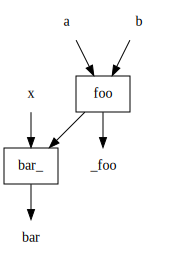

In [33]:
from meshed import DAG, FuncNode
from i2 import Sig

dag = DAG([
    FuncNode(foo, name='foo'),
    FuncNode(bar, bind={'y': 'foo'})
])
#assert str(Sig(dag)) == '(foo, x, a, b)'  # ?!?!
#assert dag(9,1,2,3) == (9, 5) 
dag.dot_digraph()

In [44]:
[node.name for node in dag.func_nodes]

['bar_', 'foo']

In [49]:
def bindings_cleaner(self):
    funcnodes_names =  [node.name for node in self.func_nodes]
    func = lambda v: self._func_node_for[v].out
    cond = lambda k,v: v in funcnodes_names
    for node in self.func_nodes:
        
        node.bind = change_value_on_cond(d, cond, func)

        
    
def change_value_on_cond(d, cond, func):
    for k,v in d.items():
        if cond(k,v):
            d[k]=func(v)
    return d




FuncNode(bar, bind={'y': 'foo'}).bind


{'y': 'foo', 'x': 'x'}

In [51]:
d = {'a':12, 'b':23}
cond = lambda k,v: v>20
func = lambda x:2*x
dd = change_value_on_cond(d, cond, func)

In [52]:
dd

{'a': 12, 'b': 46}

In [42]:
FuncNode(foo, name='foo').name

'foo'

In [47]:
nn = dag._func_node_for[foo]
nn

FuncNode(a,b -> foo -> _foo)

In [39]:
dag._func_node_for['foo'].out

'_foo'

In [16]:
from qo import ddir

In [38]:
ddir(nn)

['bind',
 'call_on_scope',
 'extractor',
 'from_dict',
 'func',
 'func_label',
 'has_as_instance',
 'name',
 'names_maker',
 'node_validator',
 'out',
 'sig',
 'synopsis_string',
 'to_dict']

In [23]:
vars(dag)

{'func_nodes': [FuncNode(y=foo,x -> bar_ -> bar),
  FuncNode(a,b -> foo -> _foo)],
 'cache_last_scope': True,
 'parameter_merge': <function meshed.util.conservative_parameter_merge(params, same_kind=True, same_default=True, same_annotation=True)>,
 'new_scope': dict,
 'name': None,
 'extract_output_from_scope': <function meshed.util.extract_values(d: dict, keys: Iterable)>,
 'graph': {'a': [FuncNode(a,b -> foo -> _foo)],
  'b': [FuncNode(a,b -> foo -> _foo)],
  FuncNode(a,b -> foo -> _foo): ['_foo'],
  'foo': [FuncNode(y=foo,x -> bar_ -> bar)],
  'x': [FuncNode(y=foo,x -> bar_ -> bar)],
  FuncNode(y=foo,x -> bar_ -> bar): ['bar']},
 'nodes': ['x',
  'foo',
  FuncNode(y=foo,x -> bar_ -> bar),
  'bar',
  'b',
  'a',
  FuncNode(a,b -> foo -> _foo),
  '_foo'],
 'var_nodes': ['x', 'foo', 'bar', 'b', 'a', '_foo'],
 '__signature__': <Sig (foo, x, a, b)>,
 'roots': ('foo', 'x', 'a', 'b'),
 'leafs': ('bar', '_foo'),
 'last_scope': None}

In [11]:
node =     FuncNode(foo, name='foo')

In [12]:
node.bind

{'a': 'a', 'b': 'b'}

In [13]:
node.out

'_foo'

In [14]:
str(Sig(dag))

'(a, b, x)'

In [30]:
def foo(x): return x + 1
def bar(x): return x * 2
dag = DAG([
             FuncNode(foo, out='foo_output'),
             FuncNode(bar, name='B', out='b', bind={'x': 'foo_output'}),
         ])

        #A ``FuncNode`` instance is indexed by both its identifier (``.name``) as well as
        #the identifier of it's output (``.out``):

dag._func_node_for['foo_output']
#        FuncNode(x -> foo -> foo_output)
dag._func_node_for['foo']
#        FuncNode(x -> foo -> foo_output)
dag._func_node_for['b']
#        FuncNode(x=foo_output -> B -> b)
dag._func_node_for['B']
#        FuncNode(x=foo_output -> B -> b)

FuncNode(x=foo_output -> B -> b)

# Duplicate names error

In [1]:
from meshed import DAG, FuncNode

def foo(x):
    return x + 1

t = foo

def foo(y):
    return y * 2

tt = foo

d = DAG([t, tt])
d.func_nodes
f, ff = d.func_nodes
print(f'{f.name=}, {ff.name=}')
print(f'{f.func_label=}, {ff.func_label=}')

f.name='foo_', ff.name='foo___2'
f.func_label='foo_', ff.func_label='foo_'


In [2]:
from i2 import Sig
Sig(d)

<Sig (x, y)>

In [73]:
from meshed.tests.test_makers import user_story_01
from meshed import code_to_dag
dag = code_to_dag(user_story_01)
assert (
        dag.synopsis_string()
        == """ -> get_data_source -> data_source
data_source -> make_wfs -> wfs
wfs,chk_size -> chunker -> chks
chks -> splitter -> train_chks__test_chks
train_chks__test_chks -> test_chks__0 -> test_chks
train_chks__test_chks -> train_chks__1 -> train_chks
featurizer_learner,train_chks -> learn_featurizer -> featurizer_obj"""
    )

AssertionError: 

In [76]:
from meshed.scrap.cached_dag import NoOverwritesDict

In [80]:
>>> d = NoOverwritesDict(a=1, b=2)
>>> d
# {'a': 1, 'b': 2}

# Writing is allowed, in new keys

>>> d['c'] = 3
>>> d
{'a': 1, 'b': 2, 'c': 3}

# It's also okay to write into an existing key if the value it holds is identical.
# In fact, the write doesn't even happen.

>>> d['b'] = 2

#But if we try to write a different value...

>>> d['b'] = 22

OverWritesNotAllowedError: The b key already exists and you're not allowed to change its value

In [82]:
from meshed.makers import code_to_dag


@code_to_dag
def dag_01():
    b = f(a)
    c = g(a)
    d = h(b, c)


@code_to_dag
def dag_02():
    b = f(a)
    c = g(x=a)
    d = h(y=b, c=c)


_string01 = '''a -> g -> c
a -> f -> b
b,c -> h -> d'''

_string02 = '''x=a -> g -> c
a -> f -> b
y=b,c -> h -> d'''


def test_synopsis_string():
    s11 = '\n'.join([fn.synopsis_string() for fn in dag_01.func_nodes])
    s21 = '\n'.join(
        [fn.synopsis_string(bind_info='hybrid') for fn in dag_01.func_nodes]
    )
    assert s11 == _string01 == s21
    s22 = '\n'.join(
        [fn.synopsis_string(bind_info='hybrid') for fn in dag_02.func_nodes]
    )
    assert s22 == _string02

OverWritesNotAllowedError: The b key already exists and you're not allowed to change its value

In [88]:
from meshed.makers import code_to_dag


@code_to_dag
def dag_01():
    b = f(a)
    c = g(a)
    d = h(b, c)


@code_to_dag
def dag_02():
    b = f(a)
    c = g(x=a)
    d = h(y=b, c=c)


_string01 = '''a -> g -> c
a -> f -> b
b,c -> h -> d'''

_string02 = '''a -> f -> b
x=a -> g -> c
y=b,c -> h -> d'''


def test_synopsis_string():
    s11 = '\n'.join([fn.synopsis_string() for fn in dag_01.func_nodes])
    s21 = '\n'.join(
        [fn.synopsis_string(bind_info='hybrid') for fn in dag_01.func_nodes]
    )
    assert s11 == _string01 == s21
    s22 = '\n'.join(
        [fn.synopsis_string(bind_info='hybrid') for fn in dag_02.func_nodes]
    )
    assert s22 == _string02

In [89]:
s11 = '\n'.join([fn.synopsis_string() for fn in dag_01.func_nodes])


In [90]:
print(s11)

a -> f -> b
a -> g -> c
b,c -> h -> d


In [91]:
s21 = '\n'.join(
        [fn.synopsis_string(bind_info='hybrid') for fn in dag_01.func_nodes]
    )
print(s21)

a -> f -> b
a -> g -> c
b,c -> h -> d


In [92]:
s22 = "\n".join(
        [fn.synopsis_string(bind_info="hybrid") for fn in dag_02.func_nodes]
    )
print(s22)

a -> f -> b
x=a -> g -> c
y=b,c -> h -> d


In [2]:
from meshed import DAG
>>> def f(a, b): return a + b
>>> def g(c, d=1): return c * d
>>> def h(x, y=1): return x ** y
>>>
>>> three_funcs = DAG([f, g, h])
>>> assert (
...     three_funcs(x=1, c=2, a=3, b=4)
...     == (7, 2, 1)
...     == (f(a=3, b=4), g(c=2), h(x=1))
...     == (3 + 4, 2*1, 1** 1)
... )

In [4]:
hg = three_funcs.add_edge('h', 'g')

In [5]:
hg

DAG(func_nodes=[FuncNode(a,b -> f_ -> f), FuncNode(x,y -> h_ -> h), FuncNode(c=h,d -> g_ -> g)], name=None)

In [7]:
assert (
             hg(a=3, b=4, x=1)
             == (7, 1)
             == (f(a=3, b=4), g(c=h(x=1)))
             == (3 + 4, 1 * (1 ** 1))
         )

In [8]:
>>> print(hg.synopsis_string())


a,b -> f_ -> f
x,y -> h_ -> h
h,d -> g_ -> g


In [9]:
        >>> fhg = three_funcs.add_edge('h', 'g').add_edge('f', 'h')


In [10]:
fhg

DAG(func_nodes=[FuncNode(a,b -> f_ -> f), FuncNode(x=f,y -> h_ -> h), FuncNode(c=h,d -> g_ -> g)], name=None)

In [13]:
assert (
             fhg(a=3, b=4)
             == 7
             == g(h(f(3, 4)))
             == ((3 + 4) * 1) ** 1
         )

In [14]:
        >>> print(fhg.synopsis_string())


a,b -> f_ -> f
f,y -> h_ -> h
h,d -> g_ -> g


In [15]:
>>> fhg = three_funcs.add_edge(h, 'g').add_edge('f_', 'h')


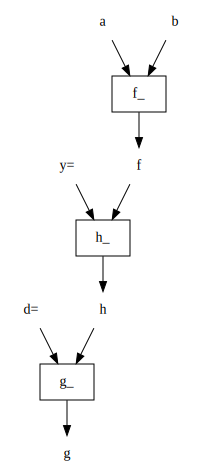

In [16]:
fhg.dot_digraph()

In [18]:
f_of_g_and_h = (
             DAG([f, g, h])
             .add_edge(g, f, to_param='a')
             .add_edge(h, f, 'b')
         )

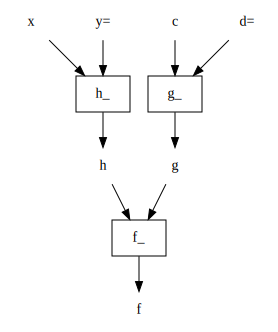

In [19]:
f_of_g_and_h.dot_digraph()

In [21]:
assert (
             f_of_g_and_h(x=2, c=3, y=2, d=2)
             == 10
             == f(g(c=3, d=2), h(x=2, y=2))
             == 3 * 2 + 2 ** 2
         )

In [23]:
dag = DAG.from_funcs(
             lambda a: a * 2,
             x=lambda: 10,
             y=lambda x, _0: x + _0  # _0 refers to first arg (lambda a: a * 2)
         )

In [24]:
        >>> print(dag.synopsis_string())


a -> lambda_0_ -> lambda_0
 -> x_ -> x
x,_0 -> y_ -> y


In [29]:
from i2 import double_up_as_factory, MultiFunc

named_funcs = dict(MultiFunc(lambda a: a * 2,
             x=lambda: 10,
             y=lambda x, _0: x + _0  # _0 refers to first arg (lambda a: a * 2
             ))


In [30]:
named_funcs

{'lambda_0': <function __main__.<lambda>(a)>,
 'x': <function __main__.<lambda>()>,
 'y': <function __main__.<lambda>(x, _0)>}

In [33]:
ff=MultiFunc(lambda a: a * 2,
             x=lambda: 10,
             y=lambda x, _0: x + _0  # _0 refers to first arg (lambda a: a * 2
             )

In [34]:
vars(ff)

{'objects': {'lambda_0': <function __main__.<lambda>(a)>,
  'x': <function __main__.<lambda>()>,
  'y': <function __main__.<lambda>(x, _0)>},
 'funcs': {'lambda_0': <function __main__.<lambda>(a)>,
  'x': <function __main__.<lambda>()>,
  'y': <function __main__.<lambda>(x, _0)>}}

In [ ]:
/Users/sylvain/Desktop/dev/otosense/i2/i2/multi_object.py

# Change funcs

In [13]:
import meshed as ms
import pytest

import meshed.base
import meshed.util

from meshed.tests.objects_for_testing import (f,g)
from meshed.dag import DAG, names_and_outs, ch_funcs
from meshed.base import (
    FuncNode,
    ch_func_node_func,
)

def example_func_nodes():

    func_nodes = [f, g]
    result = meshed.base._mk_func_nodes(func_nodes)
    return result

def test_ch_funcs_no_change():
    funcs = [f,g]
    nodes = list(example_func_nodes())
    names = [node.name for node in nodes]

    dummy_mapping = dict(zip(names, funcs))

    new_dag = ch_funcs(
        func_nodes =nodes,
        func_mapping=dummy_mapping,
    )
    new_nodes = new_dag().func_nodes
    assert nodes == new_nodes
result  = test_ch_funcs_no_change()

In [15]:
result

In [29]:
isinstance(result, DAG)

False

In [23]:
nodes = list(example_func_nodes())
names = [node.name for node in nodes]

dummy_mapping = {name:value for name, value in zip(names, nodes)}

In [25]:
dummy_mapping, dict(zip(names, nodes))

({'f_': FuncNode(a,b -> f_ -> f), 'g_': FuncNode(c,d -> g_ -> g)},
 {'f_': FuncNode(a,b -> f_ -> f), 'g_': FuncNode(c,d -> g_ -> g)})

In [21]:
result

functools.partial(<function ch_funcs at 0x7f89b83c8e50>, func_nodes=[FuncNode(a,b -> f_ -> f), FuncNode(c,d -> g_ -> g)], mapping={'f_': FuncNode(a,b -> f_ -> f), 'g_': FuncNode(c,d -> g_ -> g)})

In [22]:
d_dag =  DAG(list(example_func_nodes()))
d_dag


DAG(func_nodes=[FuncNode(a,b -> f_ -> f), FuncNode(c,d -> g_ -> g)], name=None)

In [16]:
from i2 import Sig

In [25]:
def foo(x:int, y:str)->str:
    return x*y

def goo(x:int, y:str)->str:
    return x*y

In [26]:
Sig(foo)==Sig(goo)

True

In [34]:
from typing import NamedTuple

class FlagWithMessage(NamedTuple):
    flag: bool
    msg: str = ""

def validate_func_mapping_on_signatures(func_mapping, func_nodes):
    from meshed import DAG

    #_validate_func_mapping(func_mapping, func_nodes)
    d = dict()
    dag = DAG(func_nodes)
    for key, func in func_mapping.items():
        if fnode := dag._func_node_for.get(key, None):
            old_func = fnode.func
            old_sig = Sig(old_func)
            new_sig = Sig(func)
            if old_sig == new_sig:
                result = FlagWithMessage(flag=True)
            else:
                msg = f"Signatures disagree for key={key}"
                result = FlagWithMessage(flag=False, msg=msg)

        else:
            msg = f"No funcnode matching the key {key}"
            result = FlagWithMessage(flag=False, msg=msg)
        d[key] = result
    all_flags_true = all(item.flag for item in d.values())
    return all_flags_true, d

In [35]:
nodes = list(example_func_nodes())
funcs =[f,g]
func_mapping={'f_':f, 'g_':g}

In [36]:
validate_func_mapping_on_signatures(func_mapping, nodes)

(True,
 {'f_': FlagWithMessage(flag=True, msg=''),
  'g_': FlagWithMessage(flag=True, msg='')})

In [37]:
from meshed.dag import ch_funcs, _validate_func_mapping

_validate_func_mapping(func_mapping, nodes)


In [38]:
from meshed.base import ch_func_node_func, ch_func_node_attrs
# def ch_func_node_func(
#         fn: FuncNode,
#         func: Callable,
#         *,
#         compare_func=compare_signatures,
#         alternative=raise_error
# ):
#     if compare_func(fn.func, func):
#         return ch_func_node_attrs(fn, func=func)
#     else:
#         return alternative(fn, func)

In [56]:
def compare_by_kinds_compatibility(sig1, sig2):
    k1 = sig1.names_of_kind
    k2 = sig2.names_of_kind

    return list(map(len, k1))==list(map(len,k2))




In [43]:
def zoo(x:int, msg:str)->str:
    return '12'
foo, zoo


(<function __main__.foo(x: int, y: str) -> str>,
 <function __main__.zoo(x: int, msg: str) -> str>)

In [57]:
compare_by_kinds_compatibility(Sig(foo), Sig(zoo))

True

In [52]:
k1 = Sig(foo).names_of_kind
k2 = Sig(zoo).names_of_kind



In [55]:
list(map(len, k1))==list(map(len,k2))

True

# Parametrized dag

In [6]:
from meshed import DAG
from meshed.util import extract_dict

from typing import Union, Iterable
def parametrized_dag_factory(dag: DAG, param_var_nodes: Union[str, Iterable[str]]):
    """
    Constructs a factory for sub-DAGs derived from the input DAG, with values of
    specific 'parameter' variable nodes precomputed and fixed. These precomputed nodes,
    and their ancestor nodes (unless required elsewhere), are omitted from the sub-DAG.

    The factory function produced by this operation requires arguments corresponding to
    the ancestor nodes of the parameter variable nodes. These arguments are used to
    compute the values of the parameter nodes.

    This function reflects the typical structure of a class in object-oriented
    programming, where initialization arguments are used to set certain fixed values
    (attributes), which are then leveraged in subsequent methods.

    >>> import i2
    >>> from meshed import code_to_dag
    >>> @code_to_dag
    ... def testdag():
    ...     a = criss(aa, aaa)
    ...     b = cross(aa, bb)
    ...     c = apple(a, b)
    ...     d = sauce(a, b)
    ...     e = applesauce(c, d)
    >>>
    >>> dag_factory = parametrized_dag_factory(testdag, 'a')
    >>> print(f"{i2.Sig(dag_factory)}")
    (aa, aaa)
    >>> d = dag_factory(aa=1, aaa=2)
    >>> print(f"{i2.Sig(d)}")
    (b)
    >>> d(b='bananna')
    'applesauce(c=apple(a=criss(aa=1, aaa=2), b=bananna), d=sauce(a=criss(aa=1, aaa=2), b=bananna))'

    """

    if isinstance(param_var_nodes, str):
        param_var_nodes = param_var_nodes.split()
    # The dag is split into two parts:
    #   Part whose role it is to compute the param_var_nodes from root nodes
    param_dag = dag[:param_var_nodes]
    #   Part that computes the rest based on these (and remaining root nodes)
    computation_dag = dag[param_var_nodes:]
    # Get the intersection of the two parts on the var nodes
    common_var_nodes = set(param_dag.var_nodes) & set(computation_dag.var_nodes)
    additional_var_nodes = set(computation_dag.var_nodes) - set(param_dag.var_nodes)
    ancestor_dag = dag[:additional_var_nodes]
    computation_dag = computation_dag + ancestor_dag

    @Sig(param_dag)
    def dag_factory(*parametrization_args, **parametrization_kwargs):
        # use the param_dag to compute the values of the parameter var nodes
        # (and what ever else happens to be in the leaves, but we'll remove that later)
        _ = param_dag(*parametrization_args, **parametrization_kwargs)
        # Get the values for all nodes that are common to param_dag and computation_dag
        # (There may be more than just param_var_nodes!)
        common_var_node_values = extract_dict(param_dag.last_scope, common_var_nodes)
        # By fixing those values, you now have a the computation_dag you want
        # Note: Also, remove the bound arguments
        # (i.e. the arguments that were used to compute the values)
        # so that the user doesn't change those and get inconsistencies!
        d = computation_dag.partial(
            **common_var_node_values, _remove_bound_arguments=True
        )
        # Remember the var nodes that parametrized the dag
        # TODO: Is this a good idea? Meant for debugging really.
        d._common_var_node_values = common_var_node_values
        return d

    return dag_factory

In [7]:
import i2
from i2 import Sig
from meshed import code_to_dag
@code_to_dag
def testdag():
    a = criss(aa, aaa)
    b = cross(aa, bb)
    c = apple(a, b)
    d = sauce(a, b)
    e = applesauce(c, d)
dag_factory = parametrized_dag_factory(testdag, 'a')
print(f"{i2.Sig(dag_factory)}")


(aa, aaa)


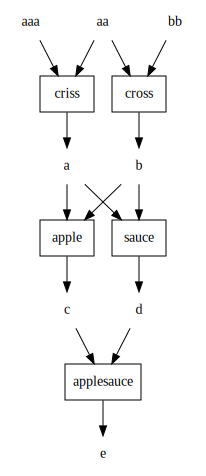

In [9]:
testdag.dot_digraph()

In [11]:
d1 = testdag[:'d']
c1 = testdag[:'c']
d1-c1

TypeError: unsupported operand type(s) for -: 'DAG' and 'DAG'

In [12]:
@code_to_dag
def testdag2():
    
    c = apple(a, b)
    d = sauce(a, b)
    e = applesauce(c, d)

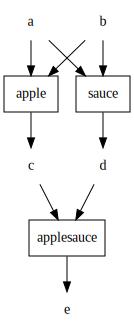

In [13]:
testdag2.dot_digraph()

In [8]:
#(aa, aaa)
d = dag_factory(aa=1, aaa=2)
print(f"{i2.Sig(d)}")
#(b)
#d(b='bananna')

TypeError: Got unexpected keyword arguments: a

In [14]:
vars(testdag2)

{'func_nodes': [FuncNode(a,b -> apple -> c),
  FuncNode(a,b -> sauce -> d),
  FuncNode(c,d -> applesauce -> e)],
 'cache_last_scope': True,
 'parameter_merge': functools.partial(<function parameter_merger at 0x7fcfa9365990>, same_kind=True, same_default=True, same_annotation=True),
 'new_scope': dict,
 'name': 'testdag2',
 'extract_output_from_scope': <function meshed.util.extract_values(d: dict, keys: Iterable)>,
 'graph': {'a': [FuncNode(a,b -> apple -> c), FuncNode(a,b -> sauce -> d)],
  'b': [FuncNode(a,b -> apple -> c), FuncNode(a,b -> sauce -> d)],
  FuncNode(a,b -> apple -> c): ['c'],
  FuncNode(a,b -> sauce -> d): ['d'],
  'c': [FuncNode(c,d -> applesauce -> e)],
  'd': [FuncNode(c,d -> applesauce -> e)],
  FuncNode(c,d -> applesauce -> e): ['e']},
 'nodes': ['a',
  'b',
  FuncNode(a,b -> apple -> c),
  FuncNode(a,b -> sauce -> d),
  'c',
  'd',
  FuncNode(c,d -> applesauce -> e),
  'e'],
 'var_nodes': ['a', 'b', 'c', 'd', 'e'],
 '__signature__': <Sig (a, b)>,
 'roots': ('a', '

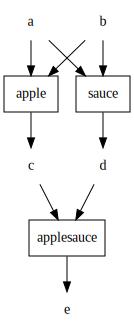

In [18]:
testdag2.dot_digraph()

In [15]:
from meshed.itools import predecessors

In [17]:
g = testdag2.graph
g

{'a': [FuncNode(a,b -> apple -> c), FuncNode(a,b -> sauce -> d)],
 'b': [FuncNode(a,b -> apple -> c), FuncNode(a,b -> sauce -> d)],
 FuncNode(a,b -> apple -> c): ['c'],
 FuncNode(a,b -> sauce -> d): ['d'],
 'c': [FuncNode(c,d -> applesauce -> e)],
 'd': [FuncNode(c,d -> applesauce -> e)],
 FuncNode(c,d -> applesauce -> e): ['e']}

In [20]:
list(predecessors(g, 'e'))

[FuncNode(c,d -> applesauce -> e),
 'c',
 'd',
 FuncNode(a,b -> apple -> c),
 'a',
 'b',
 FuncNode(a,b -> sauce -> d)]

{'e', 'd'}


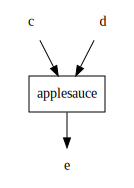

In [39]:
from meshed.itools import ancestors

def cut_subdag_and_ancestors(dag, subdag):
    subdag_nodes = subdag.var_nodes
    subdag = dag[:subdag_nodes] #to catch all ancestors
    subdag_nodes = subdag.var_nodes

    dag_nodes = dag.var_nodes
    difference = set(dag_nodes) - set(subdag_nodes)
    return dag[difference: ]


cut_subdag_and_ancestors(testdag2, testdag2[:'c']).dot_digraph()

In [41]:
@code_to_dag
def testdag3():
    
    c = apple(a, b)
    d = sauce(x, y)
    e = applesauce(c, d)

{'x', 'y', 'e', 'd'}


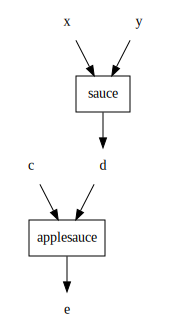

In [42]:
cut_subdag_and_ancestors(testdag3, testdag3[:'c']).dot_digraph()

In [45]:
def comp_dag(dag, param_var_nodes):   
    param_dag = dag[:param_var_nodes]
    print(f"{i2.Sig(param_dag)=}")
    #   Part that computes the rest based on these (and remaining root nodes)
    computation_dag = dag[param_var_nodes:]
    print(f"{i2.Sig(computation_dag)=}")
    # Get the intersection of the two parts on the var nodes
    common_var_nodes = set(param_dag.var_nodes) & set(computation_dag.var_nodes)
    print(f"{i2.Sig(common_var_nodes)=}")
    additional_var_nodes = set(computation_dag.var_nodes) - set(param_dag.var_nodes)
    print(f"{i2.Sig(additional_var_nodes)=}")
    ancestor_dag = dag[:additional_var_nodes]
    print(f"{i2.Sig(ancestor_dag)=}")
    computation_dag = computation_dag + ancestor_dag
            
    return computation_dag

i2.Sig(param_dag)=<Sig (a, b)>
i2.Sig(computation_dag)=<Sig (c, d)>
i2.Sig(common_var_nodes)=<Sig (c)>
i2.Sig(additional_var_nodes)=<Sig (e, d)>
i2.Sig(ancestor_dag)=<Sig (a, b, x, y)>


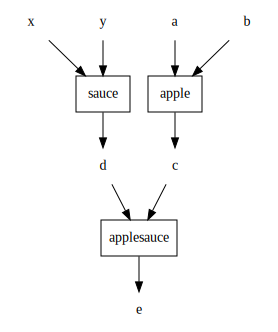

In [46]:
comp_dag(testdag3, 'c').dot_digraph()

In [47]:
from meshed import str_to_dag

d = str_to_dag('a = 1\nb = 2\nc = a + b')

ImportError: cannot import name 'str_to_dag' from 'meshed' (/Users/sylvain/Desktop/dev/otosense/meshed/meshed/__init__.py)

In [53]:
@code_to_dag
def testdag3():
    c = apple(a, b)
    d = sauce(x, y)
    e = applesauce(c, d)

Sig(parametrized_dag_factory(testdag3, 'c'))

<Sig (a, b)>

In [52]:
parametrized_dag_factory(testdag3, 'c')(a=1,b=2)

TypeError: Got unexpected keyword arguments: c

In [2]:
import i2
from meshed import code_to_dag

from meshed.dag import parametrized_dag_factory
@code_to_dag
def testdag():
    a = criss(aa, aaa)
    b = cross(aa, bb)
    c = apple(a, b)
    d = sauce(a, b)
    e = applesauce(c, d)

dag_factory = parametrized_dag_factory(testdag, 'a')
print(f"{i2.Sig(dag_factory)}")
#(aa, aaa)


(aa, aaa)


In [4]:
d = dag_factory(aa=1, aaa=2)
print(f"{i2.Sig(d)}")
#(b)
#d(b='bananna')
#'applesauce(c=apple(a=criss(aa=1, aaa=2), b=bananna), d=sauce(a=criss(aa=1, aaa=2), b=bananna))'


TypeError: Got unexpected keyword arguments: a